In [967]:
## features - u_band, g_band, r_band, i_band, z_band, redshift
## targets - BH Mass

In [968]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [969]:
#reading data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/clean_full_data_absma2g.csv')
df = df.drop(columns = ['RA', 'DEC', 'ID', 'ERR', 'M_g','M_r','M_z', 'M_u', 'Unnamed: 0','mu'])
df.head()

,Mass_ground_truth,u_band,g_band,r_band,i_band,z_band,z,M_i
0,8.973414,18.982250,18.900643,18.596375,18.584750,18.720857,1.1875,-25.451
1,8.445230,20.822754,20.706984,20.583098,20.400262,20.097541,2.0993,-25.290
2,8.844659,21.185649,20.891439,20.409386,20.336351,20.082965,1.1103,-23.982
3,8.051990,20.238111,19.877519,19.916019,19.845519,19.731352,0.6794,-23.246
4,9.409361,17.895957,17.664872,17.407213,17.446128,17.437894,1.0459,-26.482


In [970]:
# defining feature and target numpy arrays
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [971]:
# # train test split
# test_size = .01
# sc = StandardScaler()
# n_neighbors = 30
# while test_size < 1:
#     seed = np.random.seed()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
#     classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'distance', p=3)
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#     r2 = metrics.r2_score(y_test, y_pred)
#     print(test_size,rmse,r2)
#     test_size += .01

In [972]:
seed = np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = seed)

In [973]:
# normalizing features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(y_test.shape)

(1829, 7)
(1829,)


In [974]:
# KNN Regression Classifier
# # K value of 6 chosen from Pasquet 2018, Euclidean distance metric, uniform weights
n_neighbors = 30
classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'distance', p=3)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=3,
                    weights='distance')

In [975]:
# Fitting
y_pred = classifier.predict(X_test)

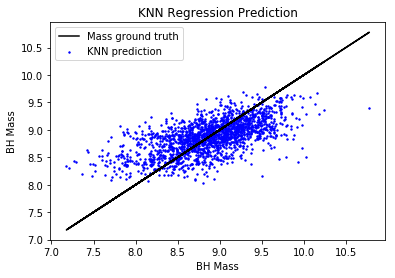

In [976]:
plt.plot(y_test, y_test, color = 'black', label = 'Mass ground truth')
plt.scatter(y_test, y_pred, color = 'blue', s=2, label = 'KNN prediction')
plt.xlabel('BH Mass')
plt.ylabel('BH Mass')
plt.legend()
plt.title('KNN Regression Prediction')
plt.show()

In [977]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.377771235236
r2 score: 0.38250086348
